# **Data Preprocessing Before Applying BOOST Methods**

#

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from IPython.display import display, HTML

In [ ]:
# Read the dataset and store it a a dataframe
df = pd.read_csv("/content/thyroidDF.csv")

In [ ]:
# View the dataframe
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,target,patient_id
0,63,F,t,f,f,t,f,f,f,f,...,t,48.000000,t,1.020000,t,47.000000,f,NaN,F,840815067
1,75,F,f,f,f,f,f,f,f,f,...,t,157.000000,t,0.890000,t,176.000000,f,NaN,A,840816008
2,41,F,f,f,f,f,f,f,f,f,...,t,33.000000,t,1.070000,t,31.000000,f,NaN,F,840816061
3,61,M,f,f,f,t,f,f,f,f,...,t,114.000000,t,0.840000,t,136.000000,f,NaN,G,840817062
4,27,F,f,f,f,f,f,f,f,f,...,t,7.500000,t,0.940000,t,7.500000,f,NaN,F,840820014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,71,M,f,f,f,f,f,f,f,f,...,t,44.150872,t,1.068935,t,30.319927,f,NaN,I,901054327
976,71,F,f,f,f,f,f,f,f,f,...,t,34.385919,t,1.005763,t,46.113455,f,NaN,I,993471736
977,72,F,f,f,f,f,f,f,f,f,...,t,41.198013,t,0.961568,t,40.893985,f,NaN,I,983206139
978,47,F,f,f,f,f,f,f,f,f,...,t,24.521011,t,0.949468,t,20.754870,f,NaN,I,918878973


In [ ]:
# Count rows, columns
df.shape

(980, 30)

In [ ]:
# Information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  980 non-null    int64  
 1   sex                  938 non-null    object 
 2   on_thyroxine         980 non-null    object 
 3   query_on_thyroxine   980 non-null    object 
 4   on_antithyroid_meds  980 non-null    object 
 5   sick                 980 non-null    object 
 6   pregnant             980 non-null    object 
 7   thyroid_surgery      980 non-null    object 
 8   I131_treatment       980 non-null    object 
 9   query_hypothyroid    980 non-null    object 
 10  query_hyperthyroid   980 non-null    object 
 11  lithium              980 non-null    object 
 12  goitre               980 non-null    object 
 13  tumor                980 non-null    object 
 14  hypopituitary        980 non-null    object 
 15  psych                980 non-null    obj

In [ ]:
# Count of Object columns
num_object_columns = len(df.select_dtypes(include='object').columns)
print(f"Number of object columns: {num_object_columns}")

# Count of numeric columns
num_numeric_columns = len(df.select_dtypes(include='number').columns)
print(f"Number of numeric columns: {num_numeric_columns}")

Number of object columns: 22
Number of numeric columns: 8


In [ ]:
# Information about data
df.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG,patient_id
count,980.000000,933.000000,780.000000,971.000000,925.000000,926.000000,8.000000,9.800000e+02
mean,53.891837,33.915796,2.038563,96.728781,0.991585,104.613531,24.625000,8.589288e+08
std,18.913073,65.890045,1.699746,67.962880,0.186052,85.394671,4.068608,2.537470e+07
min,1.000000,0.005000,0.050000,2.000000,0.280000,1.400000,18.000000,8.408151e+08
25%,39.000000,6.300000,1.000000,47.500000,0.880000,49.532938,21.750000,8.505053e+08
50%,58.000000,11.000000,1.600000,86.000000,0.980000,89.000000,25.000000,8.510660e+08
75%,69.000000,33.000000,2.500000,131.000000,1.090000,129.000000,28.000000,8.608131e+08
max,91.000000,530.000000,18.000000,430.000000,1.830000,839.000000,30.000000,9.960306e+08


In [ ]:
# count of duplicate rows
df.duplicated().sum()

1

In [ ]:
# count of null rows
df.isnull().sum()

,0
age,0
sex,42
on_thyroxine,0
query_on_thyroxine,0
on_antithyroid_meds,0
sick,0
pregnant,0
thyroid_surgery,0
I131_treatment,0
query_hypothyroid,0


In [ ]:
# Calculate total missing values and percentage of missing values
from IPython.display import display, HTML

train_total = df.isnull().sum()
train_percent = (train_total / df.shape[0]) * 100

# Create a DataFrame to hold this information
data_missing = pd.DataFrame({
    'Total nulls': train_total,
    'Percentage': train_percent
})

# Sort the DataFrame by the 'Total nulls' column in descending order
data_missing_sorted = data_missing.sort_values(by='Total nulls', ascending=False)

# Convert the DataFrame to HTML
html = data_missing_sorted.to_html()

# Display the HTML as a scrollable element
display(HTML(f"""
<div style="height:300px; overflow-y:scroll; border:1px solid black; padding:10px;">
    {html}
</div>
"""))

,Total nulls,Percentage
TBG,972,99.183673
T3,200,20.408163
T4U,55,5.612245
FTI,54,5.510204
TSH,47,4.795918
sex,42,4.285714
TT4,9,0.918367
age,0,0.000000
target,0,0.000000
TBG_measured,0,0.000000


Analyze target column

In [ ]:
df["target"].unique()

array(['F', 'A', 'G', 'C', 'H', 'D', 'B', 'E', 'I'], dtype=object)

In [ ]:
df["target"].value_counts()

,count
target,
G,419
F,239
A,193
I,60
B,21
C,18
E,13
D,9
H,8


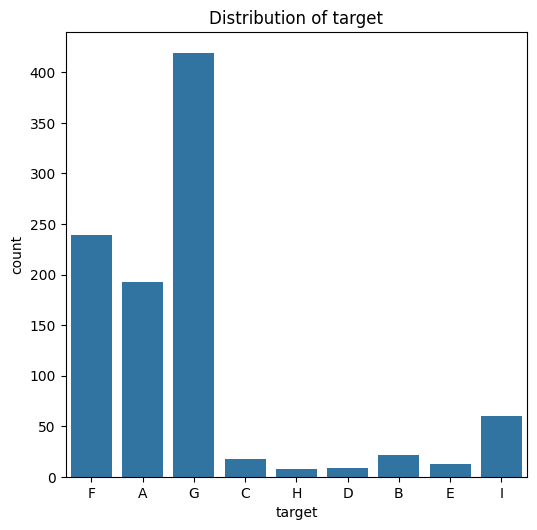

In [ ]:
# Distribution plot for target column
object_columns = ["target"]

plt.figure(figsize=(15, 10))
for i, feature in enumerate(object_columns):
    plt.subplot(2, 3, i + 1)
    sns.countplot(x=df[feature], data=df)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Load dataset (replace 'your_data.csv' with actual file)
df = pd.read_csv('/content/thyroidDF.csv')

# Count occurrences of each class (replace 'target' with actual column name)
class_counts = df['target'].value_counts()

# Get majority and minority class counts
majority_class = class_counts.max()
minority_class = class_counts.min()
total_samples = len(df)

# Calculate imbalance percentage
imbalance_percentage = ((majority_class - minority_class) / total_samples) * 100

# Print results
print(f"Majority Class: {majority_class}")
print(f"Minority Class: {minority_class}")
print(f"Total Samples: {total_samples}")
print(f"Imbalance Percentage: {imbalance_percentage:.2f}%")

# Check if dataset is imbalanced
if imbalance_percentage > 20:  # Typically, >20% indicates imbalance
    print("The dataset is highly imbalanced.")
else:
    print("The dataset is fairly balanced.")


Majority Class: 419
Minority Class: 8
Total Samples: 980
Imbalance Percentage: 41.94%
The dataset is highly imbalanced.


In [ ]:
df.drop(["patient_id"], axis=1, inplace=True)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.drop(["TBG"], axis=1, inplace=True)

In [ ]:
import pandas as pd
import numpy as np

def fill_nulls_with_random(df):
    # Identify numerical columns
    numerical_columns = df.select_dtypes(include=[np.number]).columns

    # Loop through each numerical column
    for col in numerical_columns:
        # Check for null values
        if df[col].isnull().sum() > 0:
            # Get lower and upper bounds (min and max of non-null values)
            lower_bound = df[col].min()
            upper_bound = df[col].max()

            # Generate random numbers to fill the null values
            # We only generate numbers for the number of NaNs in the column
            random_values = np.random.uniform(lower_bound, upper_bound, df[col].isnull().sum())

            # Fill NaN values with generated random numbers
            df.loc[df[col].isnull(), col] = random_values

    return df

df_filled = fill_nulls_with_random(df)

In [ ]:
# Filter for object (categorical) columns
object_df = df.select_dtypes(include='object')

# Function to fill null values with random values from unique values of the column
def fill_na_with_random_choice(column):
    if column.isnull().any():  # Check if there are NaNs in the column
        unique_values = column.dropna().unique()  # Get unique values, excluding NaNs
        if len(unique_values) > 0:
            # Generate random choices for each NaN
            random_choices = np.random.choice(unique_values, size=column.isnull().sum())
            column.fillna(pd.Series(random_choices, index=column[column.isnull()].index), inplace=True)

# Apply the function to each object column
for col in object_df.columns:
    fill_na_with_random_choice(df[col])

In [ ]:
# Filter for object (categorical) columns
object_df = df.select_dtypes(include='object')

# Identify object columns with fewer than 2 unique values
columns_with_fewer_than_two_classes = [
    col for col in object_df.columns
    if object_df[col].nunique() < 2
]

print("Object columns with fewer than 2 unique values:\n", columns_with_fewer_than_two_classes)

Object columns with fewer than 2 unique values:
 []


In [ ]:
#label encoding the object data.

from sklearn.preprocessing import LabelEncoder

# Store original column names
original_columns = df.select_dtypes(include='object').columns

# Initialize LabelEncoder
label_encoders = {}

# Apply LabelEncoder to each categorical variable
for col in original_columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Print the mapping between original categories and numerical labels
for col, encoder in label_encoders.items():
    print(f"Mapping for column '{col}':")
    for label, category in enumerate(encoder.classes_):
        print(f"Label {label}: {category}")
    print("===============================")

Mapping for column 'sex':
Label 0: F
Label 1: M
Mapping for column 'on_thyroxine':
Label 0: f
Label 1: t
Mapping for column 'query_on_thyroxine':
Label 0: f
Label 1: t
Mapping for column 'on_antithyroid_meds':
Label 0: f
Label 1: t
Mapping for column 'sick':
Label 0: f
Label 1: t
Mapping for column 'pregnant':
Label 0: f
Label 1: t
Mapping for column 'thyroid_surgery':
Label 0: f
Label 1: t
Mapping for column 'I131_treatment':
Label 0: f
Label 1: t
Mapping for column 'query_hypothyroid':
Label 0: f
Label 1: t
Mapping for column 'query_hyperthyroid':
Label 0: f
Label 1: t
Mapping for column 'lithium':
Label 0: f
Label 1: t
Mapping for column 'goitre':
Label 0: f
Label 1: t
Mapping for column 'tumor':
Label 0: f
Label 1: t
Mapping for column 'hypopituitary':
Label 0: f
Label 1: t
Mapping for column 'psych':
Label 0: f
Label 1: t
Mapping for column 'TSH_measured':
Label 0: f
Label 1: t
Mapping for column 'T3_measured':
Label 0: f
Label 1: t
Mapping for column 'TT4_measured':
Label 0: f
La

### Correlation Matrix

Correlation Matrix:
                           age       sex  on_thyroxine  query_on_thyroxine  \
age                  1.000000 -0.035850     -0.047250           -0.080795   
sex                 -0.035850  1.000000     -0.032291           -0.062761   
on_thyroxine        -0.047250 -0.032291      1.000000           -0.019910   
query_on_thyroxine  -0.080795 -0.062761     -0.019910            1.000000   
on_antithyroid_meds  0.026773  0.019346     -0.020806           -0.011875   
sick                 0.058236  0.018998      0.039551           -0.017608   
pregnant            -0.123856 -0.018430      0.033787           -0.011364   
thyroid_surgery     -0.020744 -0.042183     -0.013382           -0.007638   
I131_treatment      -0.002852 -0.002446      0.013037           -0.015394   
query_hypothyroid    0.112020 -0.050728      0.050237            0.018858   
query_hyperthyroid  -0.102391 -0.050728     -0.052942           -0.040032   
lithium             -0.039192  0.033224     -0.015850  

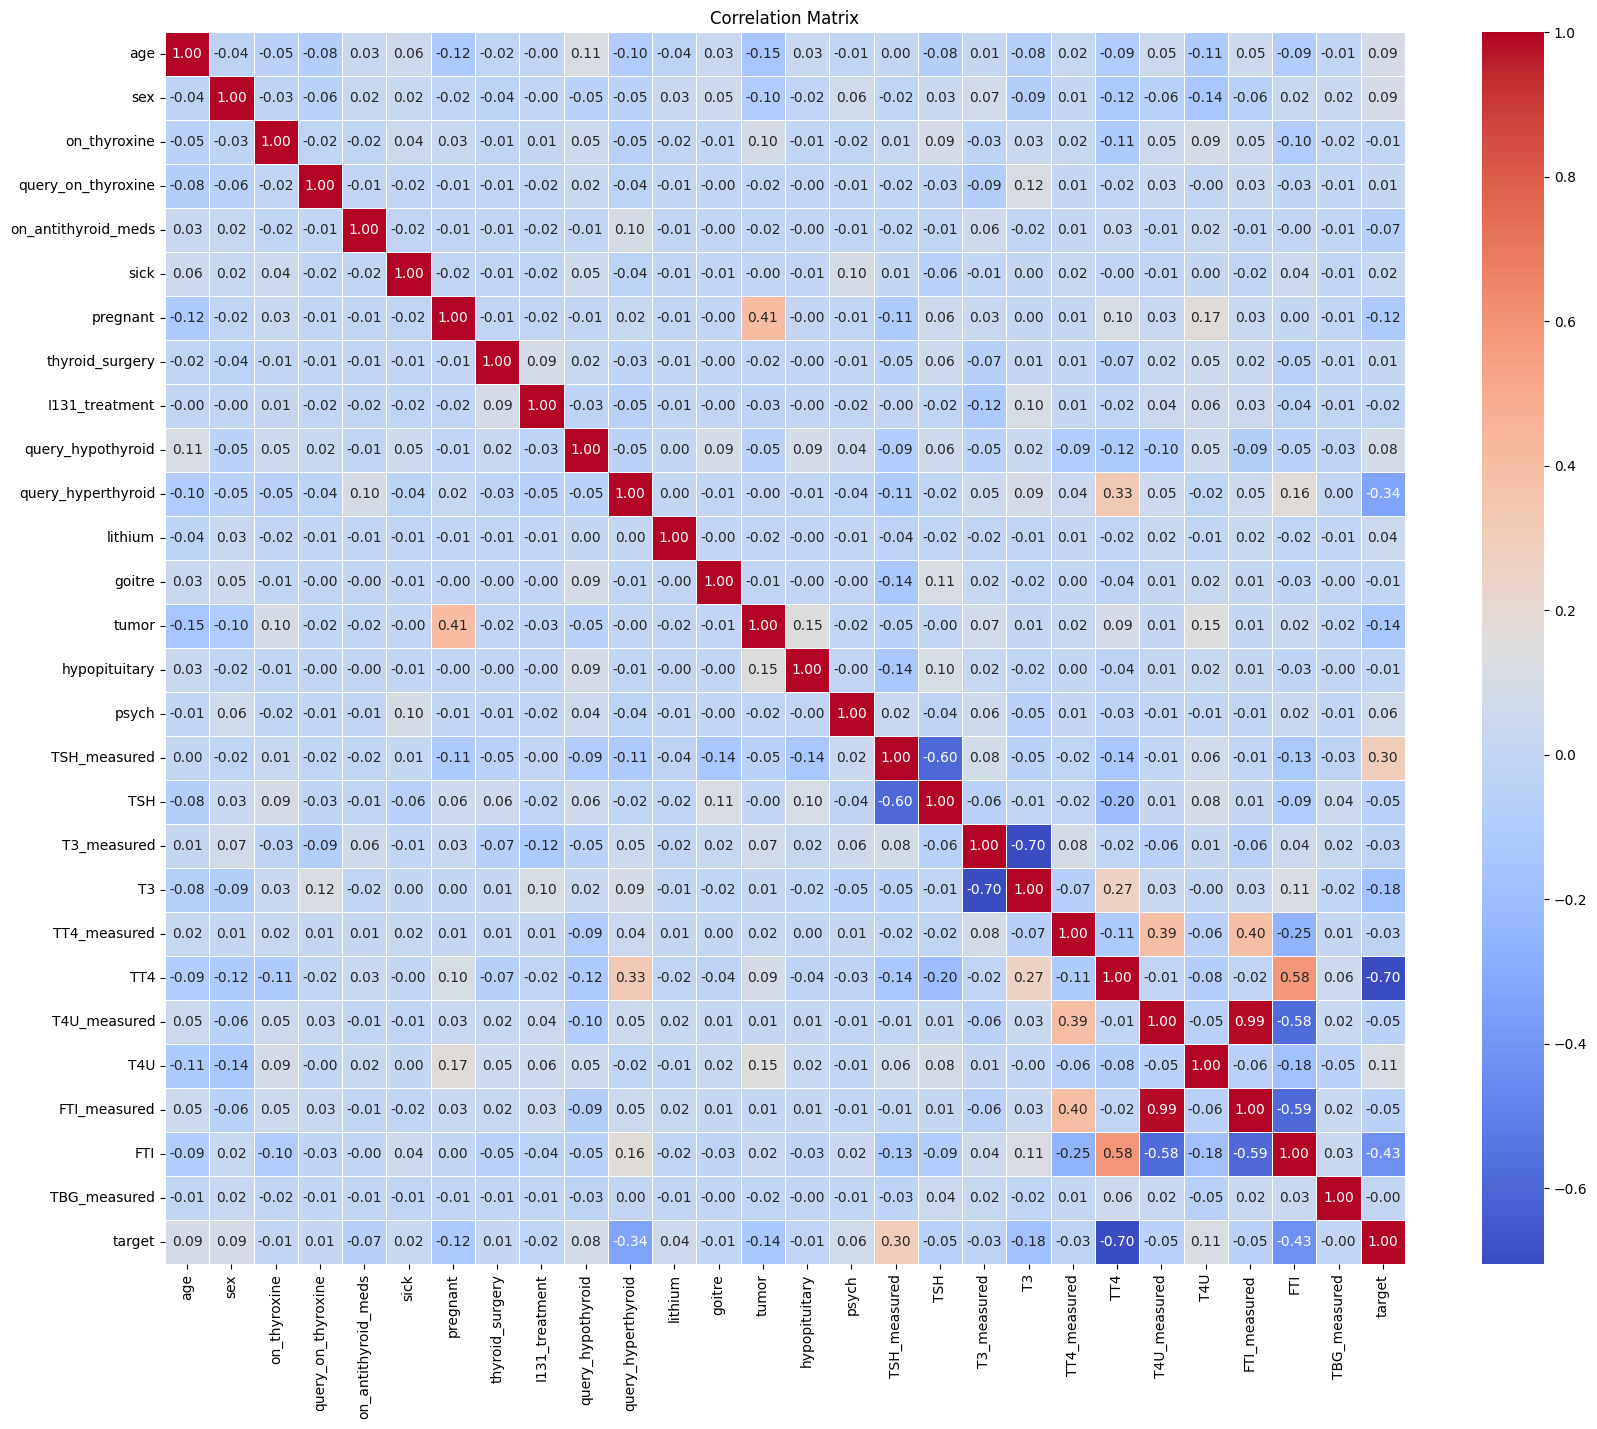

In [ ]:
# correlation matrix
correlation_matrix = df.corr()
print("Correlation Matrix:\n", correlation_matrix)

# Plot the correlation matrix
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()